<font size=6><b>lec01.금융 Pandas

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Data Load

In [3]:
sdate = '2020-01-01'
edate = '2020-06-30'
tsdf = yf.download("TSLA", sdate, edate)
ssdf = yf.download("005930.KS", sdate, edate)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
tsdf.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,27.000000,28.086000,26.805332,27.888666,27.888666,154285500
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500


In [7]:
ssdf.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,51244.261719,12993228
2020-01-03,56000.0,56600.0,54900.0,55500.0,51522.757812,15422255


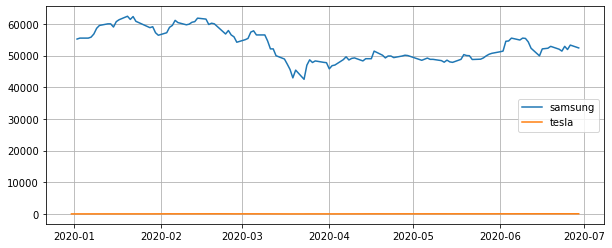

In [10]:
plt.figure(figsize=(10,4))
plt.plot(ssdf["Close"] , label="samsung")
plt.plot(tsdf["Close"], label="tesla")
plt.legend()
plt.grid()
plt.show()


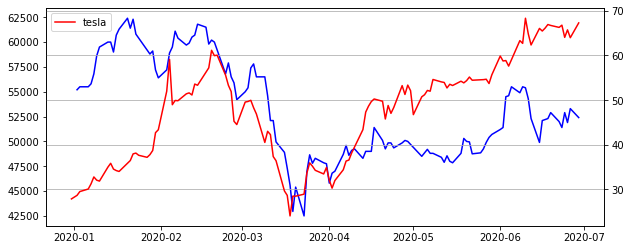

In [18]:
fig, ax1 = plt.subplots(figsize=(10, 4))
ax1.plot(ssdf.index, ssdf['Close'], color="blue", label="samsung")
ax2 = ax1.twinx() 
ax2.plot(tsdf.index, tsdf['Close'], color="red", label="tesla")
plt.legend()
plt.grid()
plt.show()

# 지수화
* 가격이 다른 두 주가의 비교

## shift(N)
* N일 대비 가격 증감에 주로 사용

In [20]:
ssdf["close_shift"] = ssdf["Close"].shift(1)
ssdf.head()

,Open,High,Low,Close,Adj Close,Volume,close_shift
Date,,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,51244.261719,12993228,NaN
2020-01-03,56000.0,56600.0,54900.0,55500.0,51522.757812,15422255,55200.0
2020-01-06,54900.0,55600.0,54600.0,55500.0,51522.757812,10278951,55500.0
2020-01-07,55700.0,56400.0,55600.0,55800.0,51801.261719,10009778,55500.0
2020-01-08,56200.0,57400.0,55900.0,56800.0,52729.597656,23501171,55800.0


In [22]:
ssdf["close_shift-1"] = ssdf["Close"].shift(-1)
ssdf.tail()

,Open,High,Low,Close,Adj Close,Volume,close_shift,close_shift-1
Date,,,,,,,,
2020-06-23,52500.0,52800.0,51100.0,51400.0,48068.875000,18086152,52000.0,52900.0
2020-06-24,51900.0,53900.0,51600.0,52900.0,49471.664062,24519552,51400.0,51900.0
2020-06-25,52100.0,53000.0,51900.0,51900.0,48536.472656,18541624,52900.0,53300.0
2020-06-26,52800.0,53900.0,52200.0,53300.0,49845.746094,21575360,51900.0,52400.0
2020-06-29,52500.0,53200.0,52000.0,52400.0,49331.714844,17776925,53300.0,NaN


In [23]:
ssdf.head()

,Open,High,Low,Close,Adj Close,Volume,close_shift,close_shift-1
Date,,,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,51244.261719,12993228,NaN,55500.0
2020-01-03,56000.0,56600.0,54900.0,55500.0,51522.757812,15422255,55200.0,55500.0
2020-01-06,54900.0,55600.0,54600.0,55500.0,51522.757812,10278951,55500.0,55800.0
2020-01-07,55700.0,56400.0,55600.0,55800.0,51801.261719,10009778,55500.0,56800.0
2020-01-08,56200.0,57400.0,55900.0,56800.0,52729.597656,23501171,55800.0,58600.0


In [25]:
# 전일 대비 오늘의 가격차
ssdf['close_diff'] = ssdf['Close']  - ssdf['close_shift']
ssdf.head()

,Open,High,Low,Close,Adj Close,Volume,close_shift,close_shift-1,close_diff
Date,,,,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,51244.261719,12993228,NaN,55500.0,NaN
2020-01-03,56000.0,56600.0,54900.0,55500.0,51522.757812,15422255,55200.0,55500.0,300.0
2020-01-06,54900.0,55600.0,54600.0,55500.0,51522.757812,10278951,55500.0,55800.0,0.0
2020-01-07,55700.0,56400.0,55600.0,55800.0,51801.261719,10009778,55500.0,56800.0,300.0
2020-01-08,56200.0,57400.0,55900.0,56800.0,52729.597656,23501171,55800.0,58600.0,1000.0


## 변동가 : diff(N) ★★★
* colse  - close.shift(1)

In [27]:
ssdf["cose_diff"] = ssdf['Close'].diff(1)
ssdf.head()

,Open,High,Low,Close,Adj Close,Volume,close_shift,close_shift-1,close_diff,cose_diff
Date,,,,,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,51244.261719,12993228,NaN,55500.0,NaN,NaN
2020-01-03,56000.0,56600.0,54900.0,55500.0,51522.757812,15422255,55200.0,55500.0,300.0,300.0
2020-01-06,54900.0,55600.0,54600.0,55500.0,51522.757812,10278951,55500.0,55800.0,0.0,0.0
2020-01-07,55700.0,56400.0,55600.0,55800.0,51801.261719,10009778,55500.0,56800.0,300.0,300.0
2020-01-08,56200.0,57400.0,55900.0,56800.0,52729.597656,23501171,55800.0,58600.0,1000.0,1000.0


## 변동률 : pct_change(N) ★★★
* 전일 대비 오늘 수익률
* (colse  - close.shift(1)) / close.shift(1)
* 오늘가격 - 어제산가격 / 어제산가격

In [31]:
ssdf["cose_pct_change"] = ssdf['Close'].pct_change(1) 
ssdf.head()

,Open,High,Low,Close,Adj Close,Volume,close_shift,close_shift-1,close_diff,cose_diff,cose_pct_change
Date,,,,,,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,51244.261719,12993228,NaN,55500.0,NaN,NaN,NaN
2020-01-03,56000.0,56600.0,54900.0,55500.0,51522.757812,15422255,55200.0,55500.0,300.0,300.0,0.005435
2020-01-06,54900.0,55600.0,54600.0,55500.0,51522.757812,10278951,55500.0,55800.0,0.0,0.0,0.000000
2020-01-07,55700.0,56400.0,55600.0,55800.0,51801.261719,10009778,55500.0,56800.0,300.0,300.0,0.005405
2020-01-08,56200.0,57400.0,55900.0,56800.0,52729.597656,23501171,55800.0,58600.0,1000.0,1000.0,0.017921


## 이동평균 : rolling(5)
* 5 20 60 120

In [34]:
ssdf["ma5"] = ssdf['Close'].rolling(5).mean()
ssdf.head()

,Open,High,Low,Close,Adj Close,Volume,close_shift,close_shift-1,close_diff,cose_diff,cose_pct_change,ma5
Date,,,,,,,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,51244.261719,12993228,NaN,55500.0,NaN,NaN,NaN,NaN
2020-01-03,56000.0,56600.0,54900.0,55500.0,51522.757812,15422255,55200.0,55500.0,300.0,300.0,0.005435,NaN
2020-01-06,54900.0,55600.0,54600.0,55500.0,51522.757812,10278951,55500.0,55800.0,0.0,0.0,0.000000,NaN
2020-01-07,55700.0,56400.0,55600.0,55800.0,51801.261719,10009778,55500.0,56800.0,300.0,300.0,0.005405,NaN
2020-01-08,56200.0,57400.0,55900.0,56800.0,52729.597656,23501171,55800.0,58600.0,1000.0,1000.0,0.017921,55760.0


## resample()

In [36]:
#매월초
ssdf['Close'].resample(rule="MS").first()

Date
2020-01-01    55200.0
2020-02-01    57200.0
2020-03-01    55000.0
2020-04-01    45800.0
2020-05-01    48500.0
2020-06-01    51200.0
Freq: MS, Name: Close, dtype: float64

In [37]:
#매월말
ssdf['Close'].resample(rule="M").first()

Date
2020-01-31    55200.0
2020-02-29    57200.0
2020-03-31    55000.0
2020-04-30    45800.0
2020-05-31    48500.0
2020-06-30    51200.0
Freq: M, Name: Close, dtype: float64

In [38]:
#매달 평균가
ssdf['Close'].resample(rule="M").mean()

Date
2020-01-31    58815.000000
2020-02-29    59085.000000
2020-03-31    50331.818182
2020-04-30    49045.000000
2020-05-31    49100.000000
2020-06-30    52995.238095
Freq: M, Name: Close, dtype: float64